In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv(r"/Users/princegupta/Documents/data science/dataset/placement.csv")

In [3]:
dataset.head(3)

,cgpa,package
0,6.87,2.10
1,9.75,22.97
2,8.66,11.78


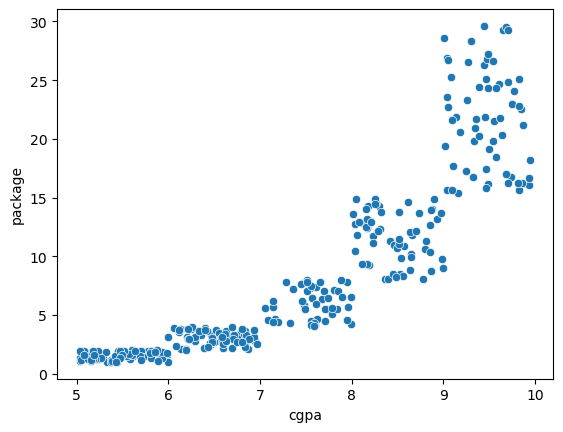

In [5]:
sns.scatterplot(x="cgpa",y="package",data=dataset)
plt.show()

In [6]:
x=dataset[["cgpa"]]
y=dataset["package"]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [10]:
pf=PolynomialFeatures(degree=2)

In [11]:
x_train1=pf.fit_transform(x_train)

In [12]:
x_test1=pf.transform(x_test)

In [14]:
from sklearn.linear_model import LinearRegression

In [16]:
lr=LinearRegression()
lr.fit(x_train1,y_train)

LinearRegression()

In [17]:
lr.score(x_train1,y_train)*100,lr.score(x_test1,y_test)*100

(84.66733090130194, 86.99057947973385)

In [21]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [24]:
dtr.score(x_train,y_train)*100,dtr.score(x_test,y_test)*100

(97.48382908623572, 88.20952060529713)

In [25]:
from sklearn.svm import SVR

In [26]:
sv=SVR()
sv.fit(x_train,y_train)

SVR()

In [27]:
sv.score(x_train,y_train)*100,sv.score(x_test,y_test)*100

(83.04349779842752, 85.51295979710332)

In [32]:
from sklearn.neighbors import KNeighborsRegressor

In [33]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [34]:
knr.score(x_train,y_train)*100,knr.score(x_test,y_test)*100

(91.68808591431267, 93.78832418163093)

In [36]:
from sklearn.ensemble import VotingRegressor

In [38]:
parameters=[("lr1",lr),("dtr1",dtr),("sv1",sv),("knr1",knr)]

In [39]:
vr=VotingRegressor(parameters)
vr.fit(x_train,y_train)

VotingRegressor(estimators=[('lr1', LinearRegression()),
                            ('dtr1', DecisionTreeRegressor()), ('sv1', SVR()),
                            ('knr1', KNeighborsRegressor())])

In [40]:
vr.score(x_train,y_train)*100,vr.score(x_test,y_test)*100

(91.8787411468865, 91.27836349168557)

In [42]:
data=pd.DataFrame([[6.87]],columns=x.columns)
vr.predict(data)

array([3.66395361])

In [44]:
predict={"lr":lr.predict(x_test1),"dtr":dtr.predict(x_test),"sv":sv.predict(x_test),"knr":knr.predict(x_test),"vr":vr.predict(x_test)}

In [45]:
table=pd.DataFrame(predict)

In [46]:
table

,lr,dtr,sv,knr,vr
0,20.348129,20.235000,18.157559,21.968,19.678451
1,12.343720,8.200000,11.889252,10.006,10.936357
2,1.626571,1.603333,1.720230,1.612,1.389561
3,12.691837,8.500000,12.280805,10.504,11.292534
4,6.392737,7.720000,5.519640,6.908,7.238414
5,23.965030,16.220000,18.341737,19.142,18.461036
6,13.332268,8.830000,12.988420,11.216,11.835756
7,1.470995,1.200000,1.538740,1.334,0.774095
8,1.680351,1.730000,1.783485,1.682,1.525088
9,1.775831,1.820000,1.890935,1.762,1.700269
